In [1]:
%run HydrogenAtom.py


In [2]:
# A script to check the orthogonality of hydrogen wavefunctions by setting up appropriate integrands
def hydrogen_wfs_integral(n1,l1,m1,n2,l2,m2):


    delta_theta = 1e-3 # This allows for the singularities when m ~ 0 at theta = 0 and pi
    # a0 = 0.529e-10  # This is the Bohr radius
    # a0=1
    r0 = 3e-9
    def integrand(r,phi,theta):
        return (r**2)*np.sin(theta)*hydrogenwf(r,theta,phi,n1,l1,m1)*np.conj(hydrogenwf(r,theta,phi,n2,l2,m2))
        
#     def int_real(*args):
#         return np.real(integrand(*args))
    def int_real(r,phi,theta):
        #print(phi,theta,r)
        return np.real(integrand(r,phi,theta))
    
    def int_imag(r,phi,theta):
        return np.imag(integrand(r,phi,theta))

    test_real = nquad(int_real, [[0, r0],[0, 2*np.pi],[delta_theta, np.pi-delta_theta]])
    test_imag = nquad(int_imag, [[0, r0],[0, 2*np.pi],[delta_theta, np.pi-delta_theta]])
   
    test_total = test_real[0] + 1j*test_imag[0]
    return test_total
                                    

In [3]:
n1 = 2
l1 = 0
m1 = 0
n2 = 2
l2 = 0
m2 = 0

print(hydrogen_wfs_integral(n1,l1,m1,n2,l2,m2)) 



(0.9999995000000412+0j)


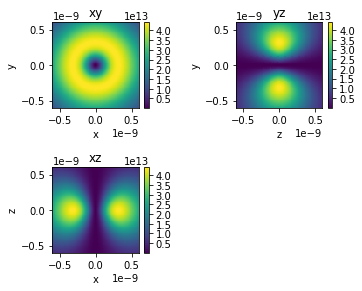

In [4]:
n = 3 # Energy quantum number 
l = 2 # Total Angular momentum quantum number
m = 2 # Angular momentum in z direction quantum number
plot_size = 6e-10
# Start Plotting Slices Through The Hydrogen Atom
a_m, b_m = np.meshgrid(np.linspace(-plot_size,plot_size,100),np.linspace(-plot_size,plot_size,100))
r_m = np.sqrt(a_m**2 + b_m**2)
wfxy = np.abs(hydrogenwf(np.sqrt(a_m**2 + b_m**2),np.pi/2,np.angle(a_m + 1j*b_m),n,l,m))
wfxz = np.abs(hydrogenwf(np.sqrt(a_m**2 + b_m**2),np.arcsin(a_m/r_m),0,n,l,m))
wfyz = np.abs(hydrogenwf(np.sqrt(a_m**2 + b_m**2),np.arcsin(a_m/r_m),np.pi/2,n,l,m))

# Now plot
fig = plt.figure(3)

ax_xy = fig.add_subplot(221)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,wspace = 0.7,hspace = 0.7 )
CB_xy = ax_xy.pcolor(a_m, b_m, wfxy )
fig.colorbar(CB_xy, ax=ax_xy)
plt.title('xy')
plt.xlabel('x')
plt.ylabel('y')

ax_yz = fig.add_subplot(222)
CB_yz = ax_yz.pcolor( b_m, a_m,wfyz)
plt.title('yz')
plt.ylabel('y')
plt.xlabel('z')
fig.colorbar(CB_yz, ax=ax_yz)

#fig.colorbar(CB_yz, ax=ax)
ax_xz = fig.add_subplot(223)
CB_xz = ax_xz.pcolor(a_m,b_m,wfxz)
plt.title('xz')
plt.xlabel('x')
plt.ylabel('z')
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
fig.colorbar(CB_xz, ax=ax_xz)

In [5]:
# A script to calculate the raduis of the atom the orthogonality of hydrogen wavefunctions by setting up appropriate integrands
def hydrogen_radius(n,l,m):


    delta_theta = 1e-3 # This allows for the singularities when m ~ 0 at theta = 0 and pi
    # a0 = 0.529e-10  # This is the Bohr radius
    # a0=1
    r0 = 3e-9
    def integrand_radius(r,phi,theta):
        res = (r**3)*np.sin(theta)*hydrogenwf(r,theta,phi,n,l,m)*np.conj(hydrogenwf(r,theta,phi,n,l,m))
        #print(res)
        return res
        

    r_ave = nquad(integrand_radius, [[0, r0],[0, 2*np.pi],[delta_theta, np.pi-delta_theta]])
   
    return r_ave

In [6]:
n = 1
l = 0
m = 0
print(hydrogen_radius(n,l,m))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:448: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


(7.934987092174676e-11, 1.0400064537098244e-11)
